In [3]:
#1 - Dataset Loading
# Import libraries for EDA
import pandas as pd
import numpy as np

# Load data
file_name = 'human_cognitive_performance.csv'

try:
    df = pd.read_csv(file_name)
    print(f"Successfully loaded {file_name}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")

display(df.head())

# Display column info to check data types and look for missing values
print("\nData information")
df.info()

Successfully loaded human_cognitive_performance.csv


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78



Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [4]:
#2 - Dataset Cleaning

# Missing Value Removal
print("--- Missing Value Check ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Duplicate Removal
print("\n--- Duplicate Value Check ---")
duplicate_count = df.duplicated().sum()
print(f"Total number of duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
    print(f"New number of rows: {len(df)}")
    
# These columns are not needed for EDA and Prediction
df = df.drop(columns=['User_ID', 'AI_Predicted_Score'], errors='ignore') 

--- Missing Value Check ---
Series([], dtype: int64)

--- Duplicate Value Check ---
Total number of duplicate rows found: 0


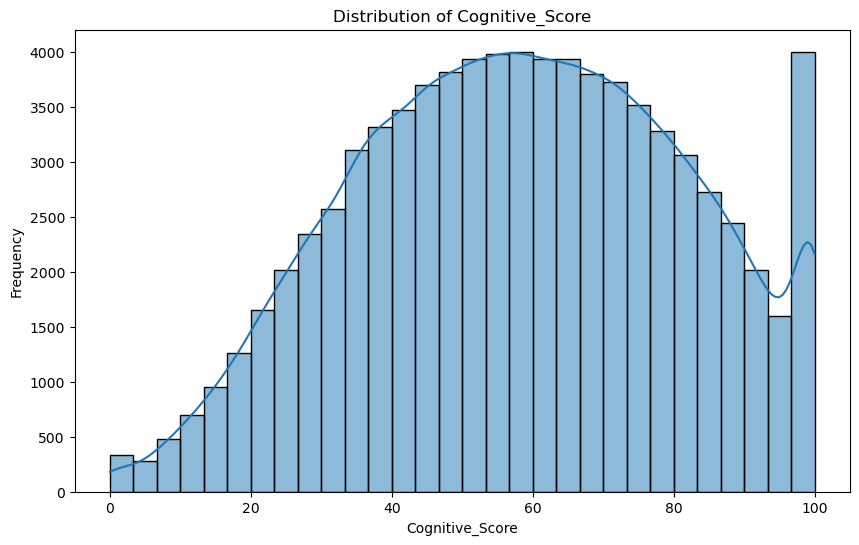

In [5]:
#3 - Target Variable Distribution:
import matplotlib.pyplot as plt
import seaborn as sns

TARGET_COLUMN = 'Cognitive_Score'

# Visualization 1: Distribution of the Target Variable (Cognitive Score)
plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET_COLUMN], kde=True, bins=30)
plt.title(f'Distribution of {TARGET_COLUMN}')
plt.xlabel(TARGET_COLUMN)
plt.ylabel('Frequency')
plt.show()



Correlation of Numeric Features with the Cognitive_Score:
Cognitive_Score      1.000000
Memory_Test_Score    0.363894
Sleep_Duration       0.150595
Age                 -0.005976
Caffeine_Intake     -0.122862
Daily_Screen_Time   -0.198515
Stress_Level        -0.227639
Reaction_Time       -0.818470
Name: Cognitive_Score, dtype: float64


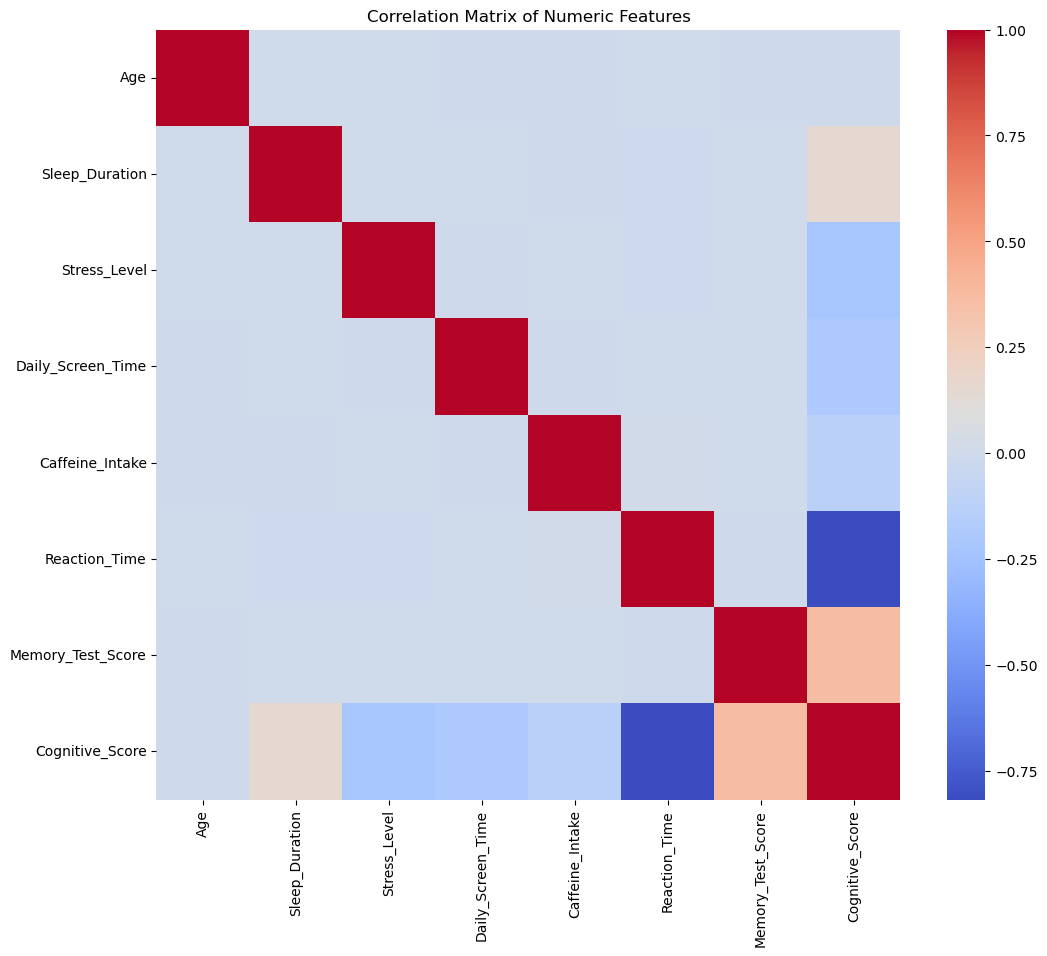

In [6]:
#4 - Numeric Feature Correlation

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
target_correlations = correlation_matrix[TARGET_COLUMN].sort_values(ascending=False)

print(f"Correlation of Numeric Features with the {TARGET_COLUMN}:")
print(target_correlations)

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
# Seen through the correlation values and heatmp, out of all the numeric lifestyle habits, 
# stress_level has the most correlation with cognitive_score. 

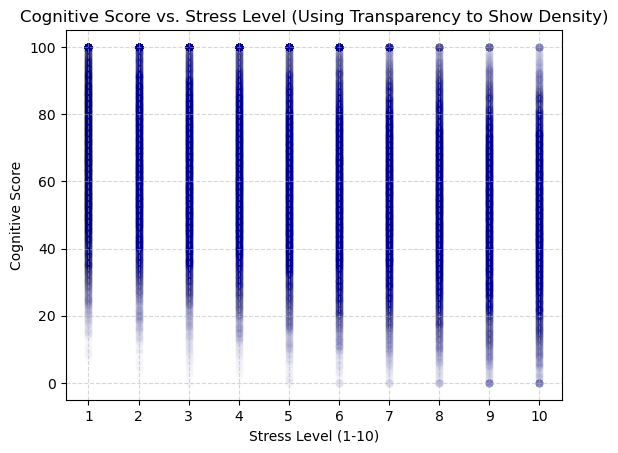

In [7]:
# Visualization 3: Top predictor
TOP_PREDICTOR = 'Stress_Level' 
    

# Use the scatter plot for stress level vs cognitive function visualizaation 
# Alpha set to 0.006, allowing for a transparency that best reveals the data density in our dataset. 
sns.scatterplot(
    x=df['Stress_Level'], 
    y=df['Cognitive_Score'], 
    alpha= 0.006,  
    color='darkblue'
)

plt.title('Cognitive Score vs. Stress Level (Using Transparency to Show Density)')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Cognitive Score')

ticks = np.arange(1, 11) 
plt.xticks(ticks) 

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

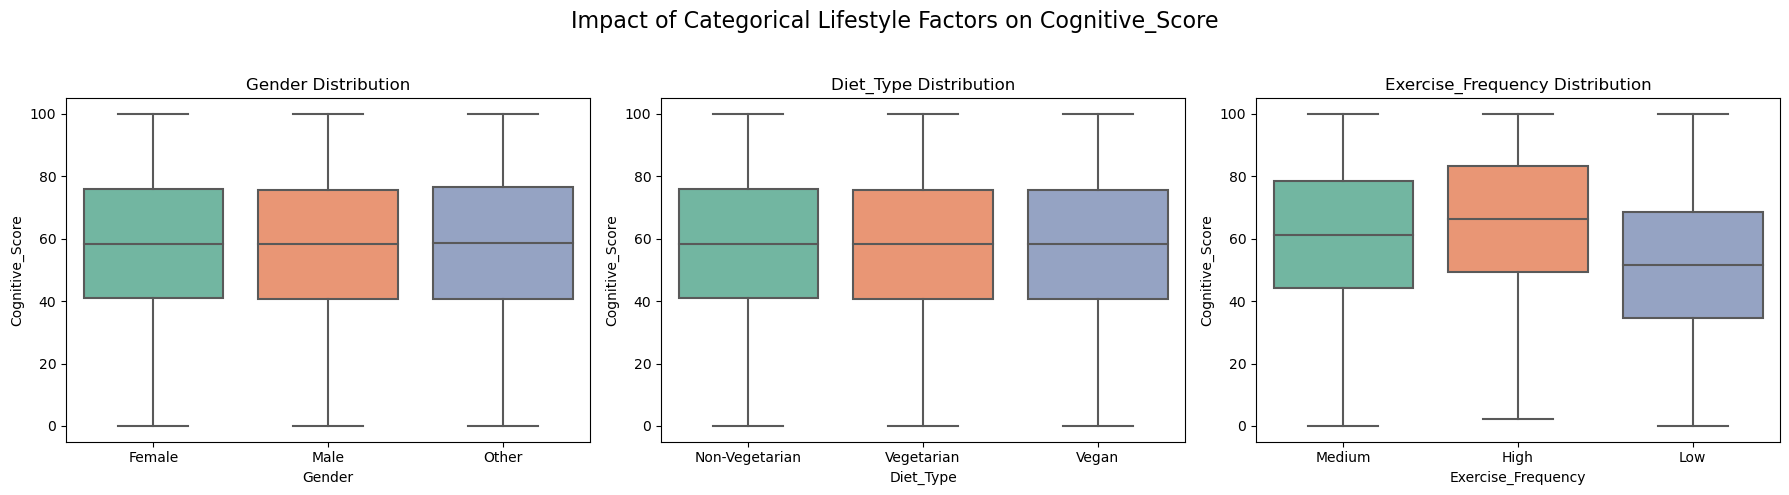

In [14]:
#5 - Categorical Feature Analysis

# List of categorical columns
CATEGORICAL_COLS = ['Gender', 'Diet_Type', 'Exercise_Frequency']
TARGET_COLUMN = 'Cognitive_Score'

# Visualize the impact of categorical variables on the Cognitive Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(f'Impact of Categorical Lifestyle Factors on {TARGET_COLUMN}', fontsize=16)

for i, col in enumerate(CATEGORICAL_COLS):
    sns.boxplot(x=col, y=TARGET_COLUMN, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(TARGET_COLUMN)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [15]:
#6 - Numeric Feature Summary Statistics: 

# Excluding User_ID and AI_Predicted_Score
numeric_features = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 
                    'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']

print("\nDescriptive Statistics for Key Numeric Features (Predictors):")
display(df[numeric_features].describe())


Descriptive Statistics for Key Numeric Features (Predictors):


,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005333,5.493762,6.504646,248.988213,399.973579,69.498350
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000


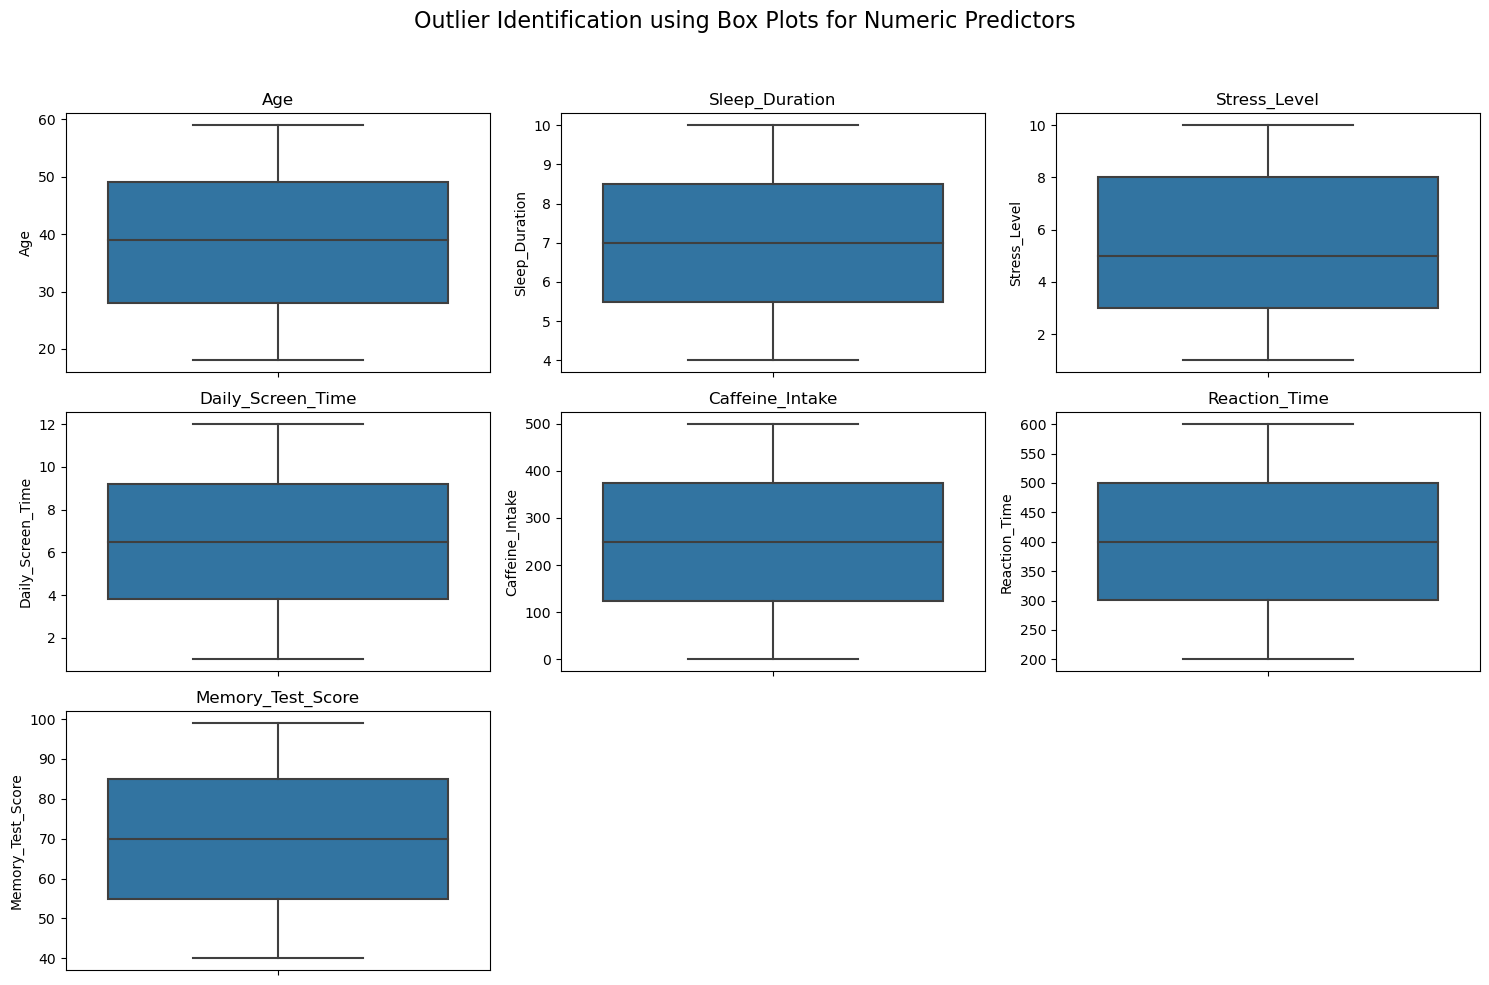

In [17]:
#7 - Outlier Analysis Visualization

# List of numeric predictors we want to check for outliers
numeric_predictors = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 
                    'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']

# Visualization for potential outlier using Box Plots
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Identification using Box Plots for Numeric Predictors', fontsize=16)

for i, col in enumerate(numeric_predictors):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel(col) # Plots contain readable labels [2]

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
#The dataset apperas to be relatively clean and exhibits no severe, unmanageable anomalies.

In [18]:
#8 - Scaling and Encoding

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np # Used here to select numeric columns

# 1. Define the columns for transformation
numeric_features = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 
                    'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']
categorical_features = ['Gender', 'Diet_Type', 'Exercise_Frequency']

# 2. Drop non-predictive columns (User_ID and the redundant AI_Predicted_Score)
X = df.drop(columns=['User_ID', 'AI_Predicted_Score', 'Cognitive_Score'], errors='ignore')
y = df['Cognitive_Score']

# 3. Create the preprocessing pipelines for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        # Scale numeric features to handle variance and prevent bias (Methodology requirement)
        ('num', StandardScaler(), numeric_features), 
        # One-hot encode categorical features (Methodology requirement)
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) 
    ],
    remainder='passthrough' # Keep any columns not listed (e.g., if there were others)
)

# 4. Apply the transformations
X_processed = preprocessor.fit_transform(X)

print("Shape of the original predictor features (X):", X.shape)
print("Shape of the processed features (X_processed):", X_processed.shape)
# The column count increases due to one-hot encoding categorical variables

Shape of the original predictor features (X): (80000, 10)
Shape of the processed features (X_processed): (80000, 16)


In [19]:
#9 Modeling Setup

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Split the processed data into training and testing sets (80% train, 20% test is common)
# Setting random_state ensures reproducibility (a key aspect of good code quality [4]).
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    y, 
    test_size=0.2, 
    random_state=42
)

# 2. Define the baseline model (Linear Regression, as per methodology [3])
# This object will be trained and evaluated in the next assignment phase (Model Training).
baseline_model = LinearRegression()

print("Data Split Complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("Baseline model (Linear Regression) defined and ready for training.")

Data Split Complete.
X_train shape: (64000, 16)
X_test shape: (16000, 16)
Baseline model (Linear Regression) defined and ready for training.
